In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
investments_df = pd.read_csv('/content/data/investments.csv')
budget_df = pd.read_csv('/content/data/budget.csv')

In [3]:
investments_df['Date'] = pd.to_datetime(investments_df['Date'], format='%d/%m/%Y')

# Calculate total investments per sector
sector_total_investments = investments_df.groupby('Sector')['Amount'].sum().reset_index()

# Merge budget and investment data
# First, clean up the budget dataframe
budget_df['Sector'] = budget_df['Sector'].fillna('Unallocated')

In [4]:
def calculate_remaining_budget(row):
    sector = row['Sector']
    budget_amount = row['Amount']

    # Get total investments for this sector
    sector_investments = sector_total_investments[sector_total_investments['Sector'] == sector]
    total_investment = sector_investments['Amount'].sum() if not sector_investments.empty else 0

    # Calculate remaining budget
    remaining_budget = budget_amount - total_investment if pd.notna(budget_amount) else None

    return pd.Series({
        'Sector': sector,
        'Total Budget': budget_amount,
        'Total Investments': total_investment,
        'Remaining Budget': remaining_budget
    })

# Apply budget calculation
budget_analysis = budget_df.apply(calculate_remaining_budget, axis=1)

In [5]:
def filter_investment_opportunities(row):
    sector = row['Sector']
    remaining_budget = row['Remaining Budget']

    if pd.isna(remaining_budget):
        return investments_df[investments_df['Sector'] == sector]

    return investments_df[
        (investments_df['Sector'] == sector) &
        (investments_df['Amount'] <= remaining_budget)
    ]

In [6]:
def filter_investment_opportunities(row):
    sector = row['Sector']
    remaining_budget = row['Remaining Budget']

    if pd.isna(remaining_budget):
        return investments_df[investments_df['Sector'] == sector]

    return investments_df[
        (investments_df['Sector'] == sector) &
        (investments_df['Amount'] <= remaining_budget)
    ]

In [8]:
investment_opportunities = {}
for _, row in budget_analysis.iterrows():
    investment_opportunities[row['Sector']] = filter_investment_opportunities(row)

# Time-based Investment Analysis
# Monthly investment trend
monthly_investments = investments_df.set_index('Date').groupby([
    pd.Grouper(freq='M'), 'Sector'
])['Amount'].sum().unstack()

# Quarterly investment trend
quarterly_investments = investments_df.set_index('Date').groupby([
    pd.Grouper(freq='Q'), 'Sector'
])['Amount'].sum().unstack()

<ipython-input-8-a94ee5cd6eb5>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'Sector'
<ipython-input-8-a94ee5cd6eb5>:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  pd.Grouper(freq='Q'), 'Sector'


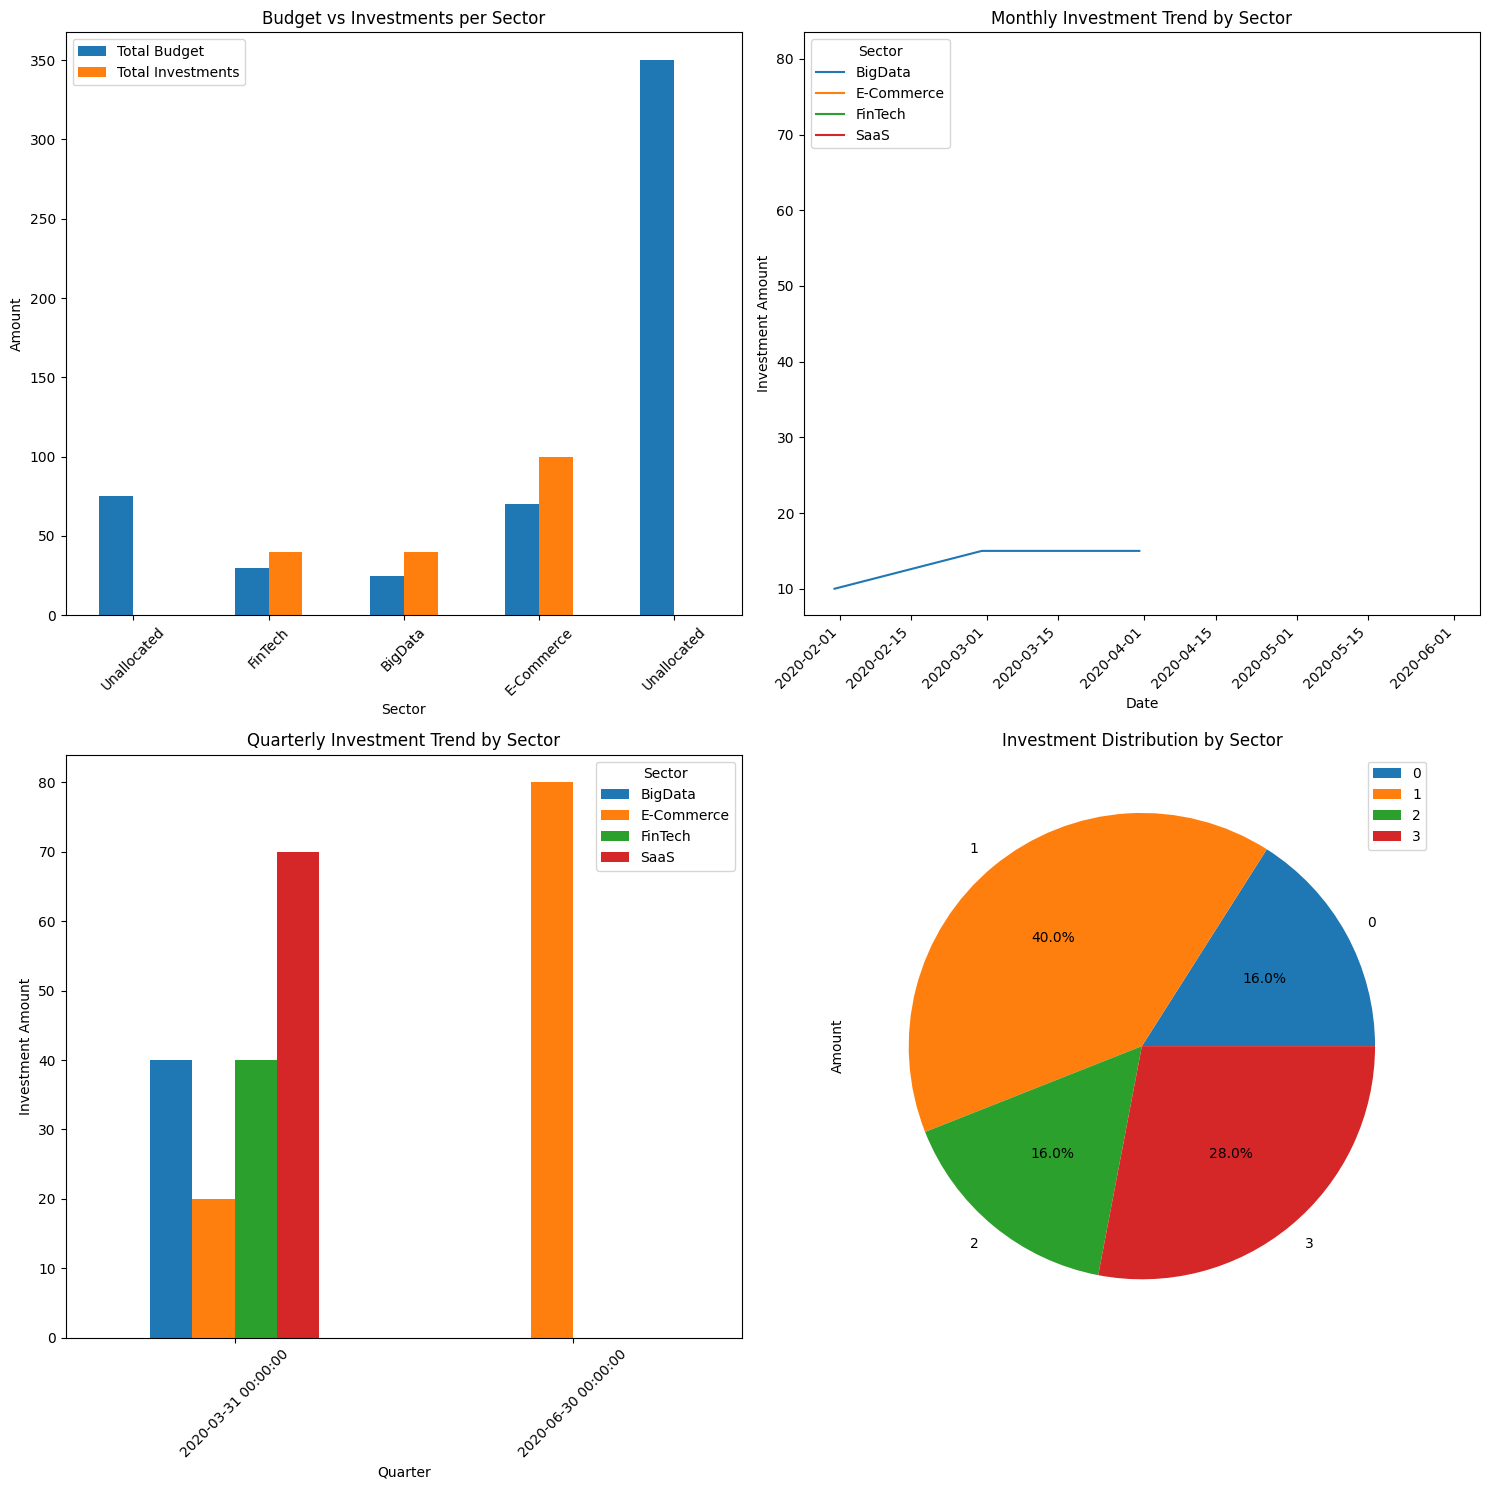

Budget Analysis:
        Sector  Total Budget  Total Investments  Remaining Budget
0  Unallocated          75.0                  0              75.0
1      FinTech          30.0                 40             -10.0
2      BigData          25.0                 40             -15.0
3   E-Commerce          70.0                100             -30.0
4  Unallocated         350.0                  0             350.0

Investment Opportunities by Sector:

Unallocated Opportunities:
Empty DataFrame
Columns: [ID, Date, Amount, Sector]
Index: []

FinTech Opportunities:
Empty DataFrame
Columns: [ID, Date, Amount, Sector]
Index: []

BigData Opportunities:
Empty DataFrame
Columns: [ID, Date, Amount, Sector]
Index: []

E-Commerce Opportunities:
Empty DataFrame
Columns: [ID, Date, Amount, Sector]
Index: []


In [9]:
plt.figure(figsize=(15, 15))

# 1. Budget vs Investments per Sector
plt.subplot(2, 2, 1)
budget_analysis.plot(x='Sector', y=['Total Budget', 'Total Investments'],
                     kind='bar', ax=plt.gca())
plt.title('Budget vs Investments per Sector')
plt.xlabel('Sector')
plt.ylabel('Amount')
plt.xticks(rotation=45)

# 2. Monthly Investment Trend
plt.subplot(2, 2, 2)
monthly_investments.plot(kind='line', ax=plt.gca())
plt.title('Monthly Investment Trend by Sector')
plt.xlabel('Date')
plt.ylabel('Investment Amount')
plt.xticks(rotation=45)

# 3. Quarterly Investment Trend
plt.subplot(2, 2, 3)
quarterly_investments.plot(kind='bar', ax=plt.gca())
plt.title('Quarterly Investment Trend by Sector')
plt.xlabel('Quarter')
plt.ylabel('Investment Amount')
plt.xticks(rotation=45)

# 4. Investment Distribution by Sector
plt.subplot(2, 2, 4)
sector_total_investments.plot(x='Sector', y='Amount', kind='pie',
                               autopct='%1.1f%%', ax=plt.gca())
plt.title('Investment Distribution by Sector')

plt.tight_layout()
plt.show()

# Print out key findings
print("Budget Analysis:")
print(budget_analysis)

print("\nInvestment Opportunities by Sector:")
for sector, opportunities in investment_opportunities.items():
    print(f"\n{sector} Opportunities:")
    print(opportunities)